<a href="https://colab.research.google.com/github/Lilchoto3/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [2]:
# I'm going to be using the Poker Hand data because I think it'll be interesting to work with
# It has a testing and training data set, I'll work with just the training for now
import pandas as pd

# First I wanna start by just taking a look at the raw data
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data

# Yeah this looks like a proper CSV, but I don't see any headers, so I'll have to assemble those myself
column_names = ["suit1", "rank1", "suit2", "rank2", "suit3", "rank3", "suit4", "rank4", "suit5", "rank5", "class"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data", names=column_names)

# First let's check the data set
df.head()

,suit1,rank1,suit2,rank2,suit3,rank3,suit4,rank4,suit5,rank5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [3]:
df.tail()

# Looks good, except there are only 25,010 rows compared to the 1,,025,010 rows listed on the website
# Looking into this, that's because the other million rows are in the testing data
# So overall, I do have the correct amount of rows, I'm just not using all of them.

,suit1,rank1,suit2,rank2,suit3,rank3,suit4,rank4,suit5,rank5,class
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1
25009,1,7,3,11,3,3,4,8,3,7,1


In [4]:
# Let's check for missing values
print(df.info(), "\n")
print(df.isnull().sum(), "\n")

# Looks good, they're also all numbers too, which corrosponds with what the website says.

# One way I could check for missing or incorrect values is to check if there are any outside
# the ranges given on the website; for example, the values in suit columns
# go between 1 and 4, inclusive, and the values in rank columns go between 1 and 13 inclusive.
# If there were missing values that were secretly zeroes or something, I could check that way.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
suit1    25010 non-null int64
rank1    25010 non-null int64
suit2    25010 non-null int64
rank2    25010 non-null int64
suit3    25010 non-null int64
rank3    25010 non-null int64
suit4    25010 non-null int64
rank4    25010 non-null int64
suit5    25010 non-null int64
rank5    25010 non-null int64
class    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB
None 

suit1    0
rank1    0
suit2    0
rank2    0
suit3    0
rank3    0
suit4    0
rank4    0
suit5    0
rank5    0
class    0
dtype: int64 



In [5]:
df.describe()

# Honestly, this doesn't really tell me much about the data itself other than:
# - The ranks and suit of the cards are pretty evenly spread out
# - The "classes" of poker hands tend toward the lower end, that being nothing in hand or one pair

# Stuff like the mean, standard deviation, min, and max aren't really useful since most of the data is ordinal
# Class is really the only one that I can pull any meaningful data out of, really.

,suit1,rank1,suit2,rank2,suit3,rank3,suit4,rank4,suit5,rank5,class
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# For my second data set I'll do the one about wine, using the red data set
#from google.colab import files
#files.upload()

# I opened up the csv on my own pc, the only slightly worrying thing is that the seperators are
# semi-colons rather than commas, but LibreOffice opened it fine and tried to import it
# into a grid so it looks fine. I see there's a header for the first row too so I don't need
# to construct that on my own as well.

df2 = pd.read_csv("winequality-red.csv", sep=";")
# Had to include the sep=";" or else the table was only one row with everything squished into it

In [7]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df2.tail()

# Again, I don't have all the instances listed on the website, but that's because
# I'm only using the entries for red wine.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
# Now to check for missing values
print(df2.info(), "\n")
print(df2.isnull().sum())

# Looks good. Website says there shouldn't be any missing values in the data set either.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                

In [10]:
df2.describe()
# This is kind of interesting to see all of the data points and mean and standard deviation
# I think the only thing that really stands out to me here is that the quality,
# which supposed to be on a scale of 1 to 10, has a minimum of 3 and a max of 8 in the data.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [11]:
# For the poker hand data set, I can show how balanced the card draws are using crosstabs
pd.crosstab(df["suit1"], df["rank1"])

rank1,1,2,3,4,5,6,7,8,9,10,11,12,13
suit1,,,,,,,,,,,,,
1,455,474,474,460,466,455,476,524,462,479,488,464,473
2,505,477,460,449,495,462,509,488,521,448,511,491,482
3,493,503,467,514,482,457,470,464,473,484,478,475,490
4,529,487,481,496,449,486,506,472,511,466,449,510,470


In [12]:
pd.crosstab(df["suit2"], df["rank2"])

rank2,1,2,3,4,5,6,7,8,9,10,11,12,13
suit2,,,,,,,,,,,,,
1,484,507,485,505,429,506,467,461,486,510,476,494,499
2,496,470,464,451,478,508,502,462,467,461,483,490,512
3,478,479,488,444,468,476,459,473,472,488,461,488,483
4,527,465,475,505,470,466,484,502,452,463,511,467,513


In [13]:
pd.crosstab(df["suit3"], df["rank3"])

rank3,1,2,3,4,5,6,7,8,9,10,11,12,13
suit3,,,,,,,,,,,,,
1,485,462,531,481,502,473,451,477,485,476,458,520,429
2,470,489,480,493,483,497,492,477,405,483,473,487,479
3,453,487,468,477,453,472,498,453,468,500,484,462,478
4,487,472,486,484,482,442,486,505,494,541,498,518,524


In [14]:
pd.crosstab(df["suit4"], df["rank4"])

rank4,1,2,3,4,5,6,7,8,9,10,11,12,13
suit4,,,,,,,,,,,,,
1,476,481,505,466,521,450,493,504,478,523,500,441,431
2,472,485,516,475,444,512,502,426,500,454,474,489,499
3,509,520,491,447,462,489,483,467,491,496,499,477,483
4,526,501,487,514,456,462,465,468,477,451,480,431,461


In [15]:
pd.crosstab(df["suit5"], df["rank5"])

# So yeah, for all of each of the five cards, they seem pretty spread even in terms of
# what the card is specifically in terms of rank and suit, which is to be expected.

rank5,1,2,3,4,5,6,7,8,9,10,11,12,13
suit5,,,,,,,,,,,,,
1,488,466,482,525,511,481,433,533,483,520,484,443,459
2,492,497,451,448,473,480,463,465,471,451,493,478,510
3,500,512,496,493,491,498,465,463,468,519,476,467,466
4,490,482,485,480,488,435,472,533,509,458,452,475,457


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

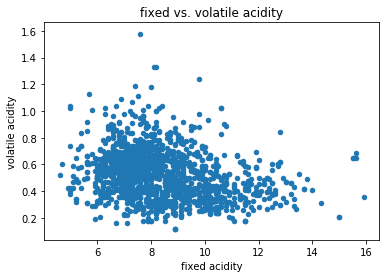

In [16]:
import matplotlib.pyplot as plt
# These are the types of graphs I can use in the wine data set, so I'll start working with that.
df2.plot(x="fixed acidity", y="volatile acidity", title="fixed vs. volatile acidity", kind="scatter");

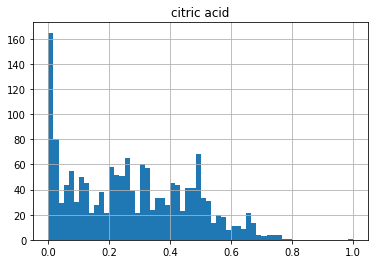

In [17]:
df2.hist(column="citric acid", bins=60);

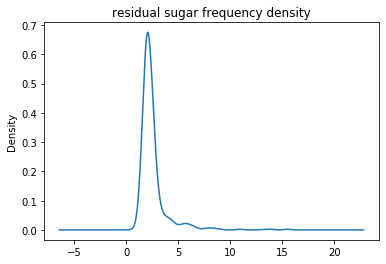

In [18]:
df2["residual sugar"].plot.density();
plt.title("residual sugar frequency density");

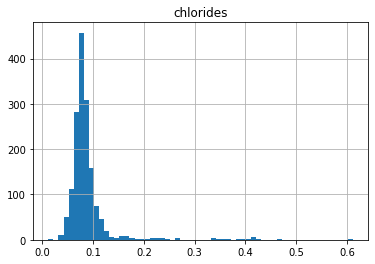

In [19]:
df2.hist(column="chlorides", bins=60);

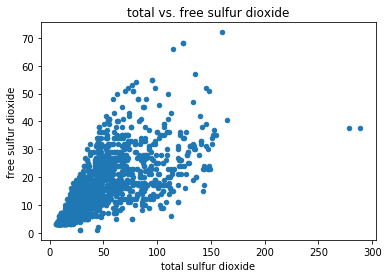

In [20]:
df2.plot(x="total sulfur dioxide", y="free sulfur dioxide", title="total vs. free sulfur dioxide", kind="scatter");

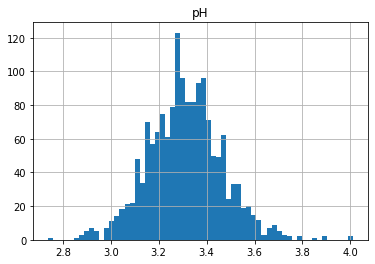

In [21]:
df2.hist(column="pH", bins=60);

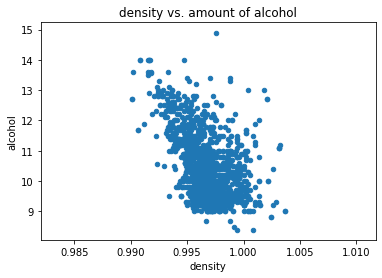

In [22]:
df2.plot(x="density", y="alcohol", title="density vs. amount of alcohol", kind="scatter");

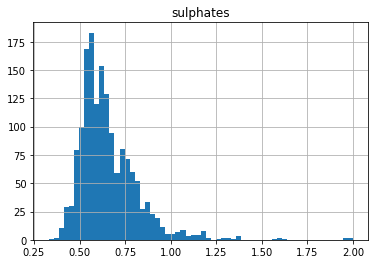

In [23]:
df2.hist(column="sulphates", bins=60);

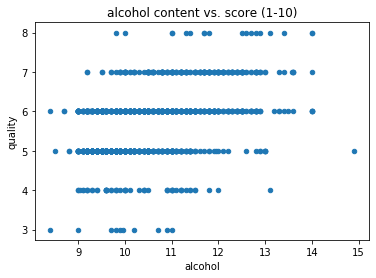

In [24]:
df2.plot(x="alcohol", y="quality", title="alcohol content vs. score (1-10)", kind="scatter");

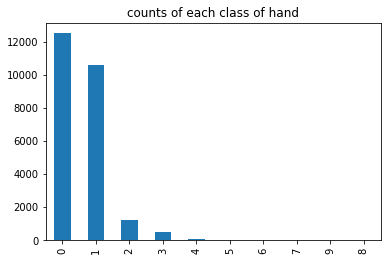

In [31]:
# Here's a bar graph of the classes of poker hands
df["class"].value_counts().plot(kind="bar", title="counts of each class of hand");

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


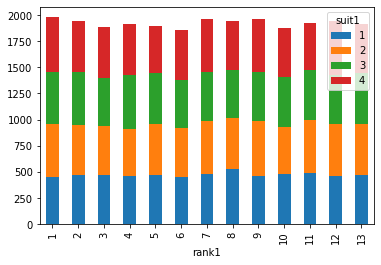

In [26]:
# I'm going to show how flat the distributions of cards drawn per slot are for the poker data
pd.crosstab(df["rank1"], df["suit1"]).plot(kind="bar", stacked=True);

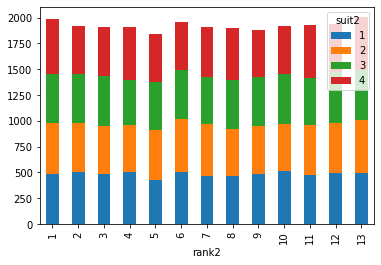

In [27]:
pd.crosstab(df["rank2"], df["suit2"]).plot(kind="bar", stacked=True);

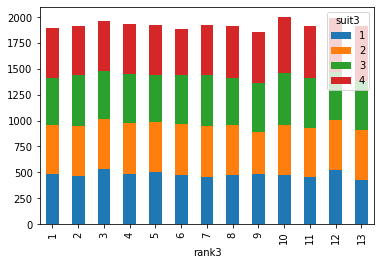

In [32]:
pd.crosstab(df["rank3"], df["suit3"]).plot(kind="bar", stacked=True);

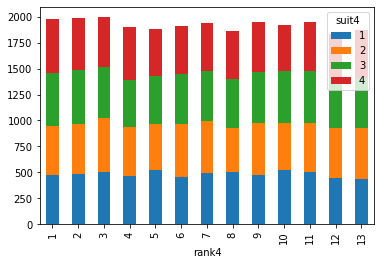

In [33]:
pd.crosstab(df["rank4"], df["suit4"]).plot(kind="bar", stacked=True);

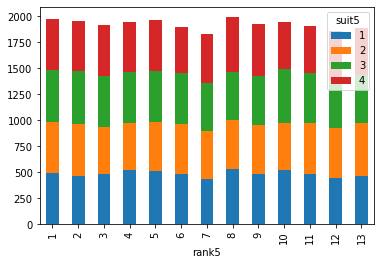

In [34]:
pd.crosstab(df["rank5"], df["suit5"]).plot(kind="bar", stacked=True);

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.